<a href="https://colab.research.google.com/github/CGS2002/PRECOG-_TASK/blob/main/Task%20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
dfe=pd.read_csv('/content/drive/MyDrive/IIIT Graph/Cit-HepPh.txt', sep='\t', header=None, names=['source', 'target'],skiprows=4)
dfn=pd.read_csv('/content/drive/MyDrive/IIIT Graph/cit-HepPh-dates.txt', sep='\t', header=None, names=['Node', 'Time'],skiprows=1)
dfn['Time']=pd.to_datetime(dfn['Time'])

In [30]:
df = pd.merge(dfe, dfn, left_on='source', right_on='Node', how='inner')
df = pd.merge(df, dfn, left_on='target', right_on='Node', how='inner', suffixes=('_source', '_target'))

In [31]:
G = nx.DiGraph()
for _, row in df.iterrows():
    source, target = row['source'], row['target']
    time_source, time_target = row['Time_source'], row['Time_target']

    G.add_node(source, time=time_source)
    G.add_node(target, time=time_target)
    G.add_edge(source, target, time=max(time_source, time_target))

In [32]:
GT=nx.DiGraph()
GT.add_nodes_from(list(set(dfe[['source', 'target']].values.flatten())))
m=[tuple(x) for x in dfe.to_records(index=False)]
GT.add_edges_from(m)

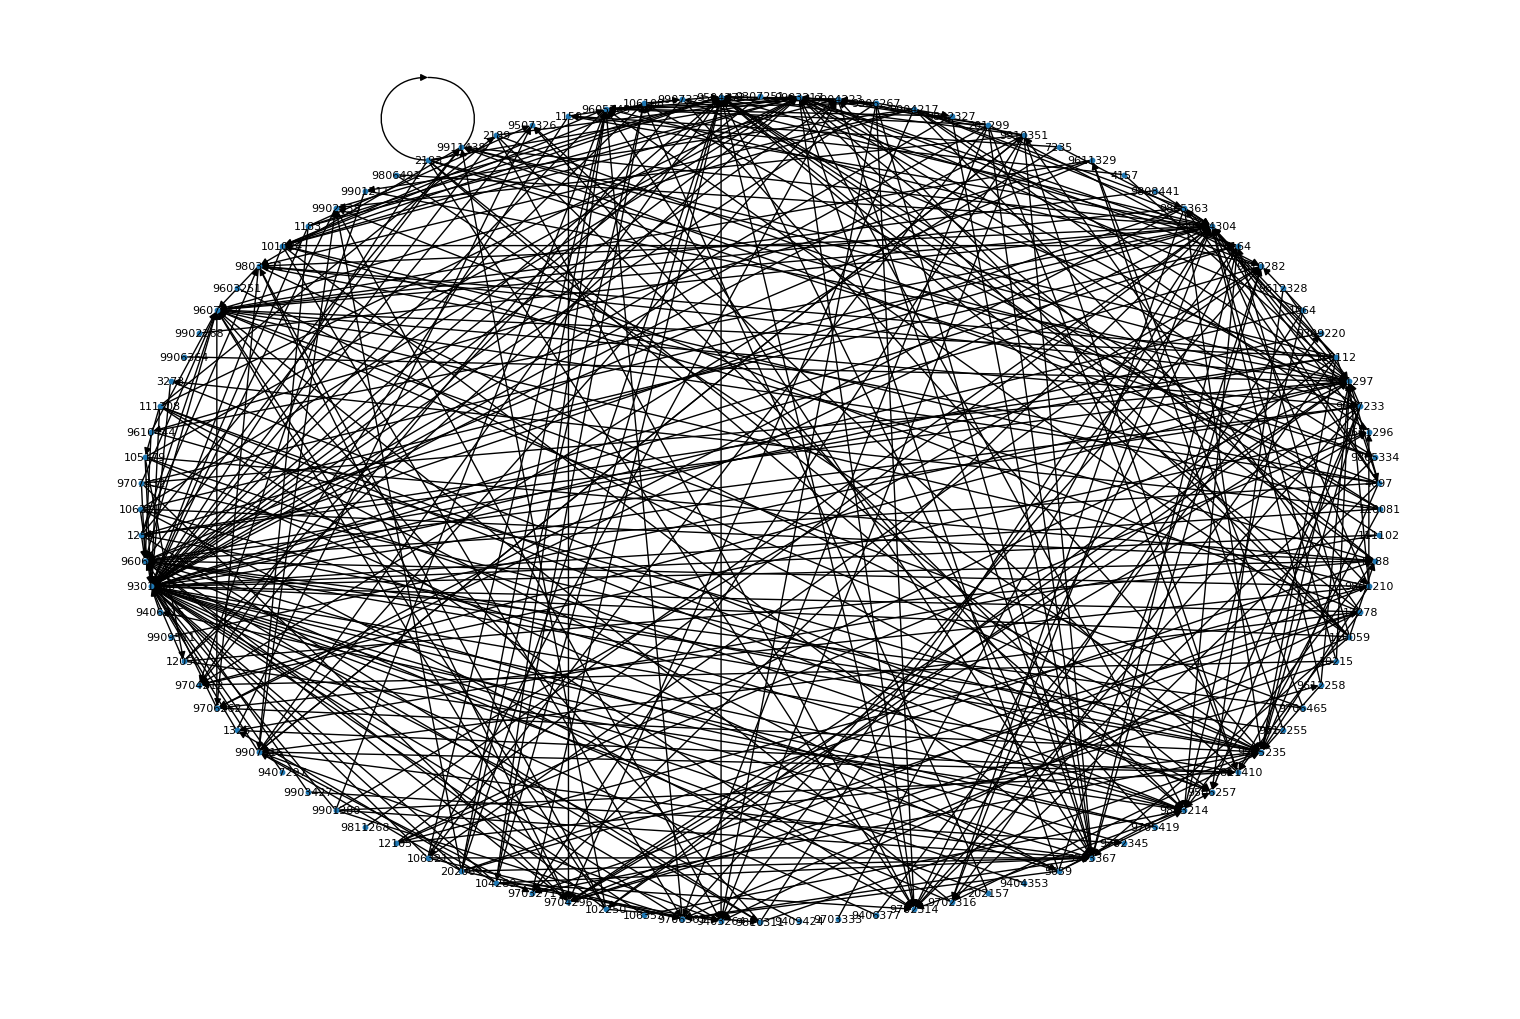

In [33]:
plt.figure(figsize=(15, 10))
subset_nodes = list(G.nodes())[:100]
subgraph = G.subgraph(subset_nodes)

pos =nx.circular_layout(subgraph)


nx.draw(subgraph, pos, with_labels=True, node_size=10, font_size=8)

plt.show()

In [34]:
time_intervals = sorted(set([d['time'] for _, _, d in G.edges(data=True)]))

In [35]:
with open('/content/drive/MyDrive/IIIT Graph/nodes.pkl', 'rb') as file:
    properties_over_time = pickle.load(file)

properties_df = pd.DataFrame(properties_over_time)

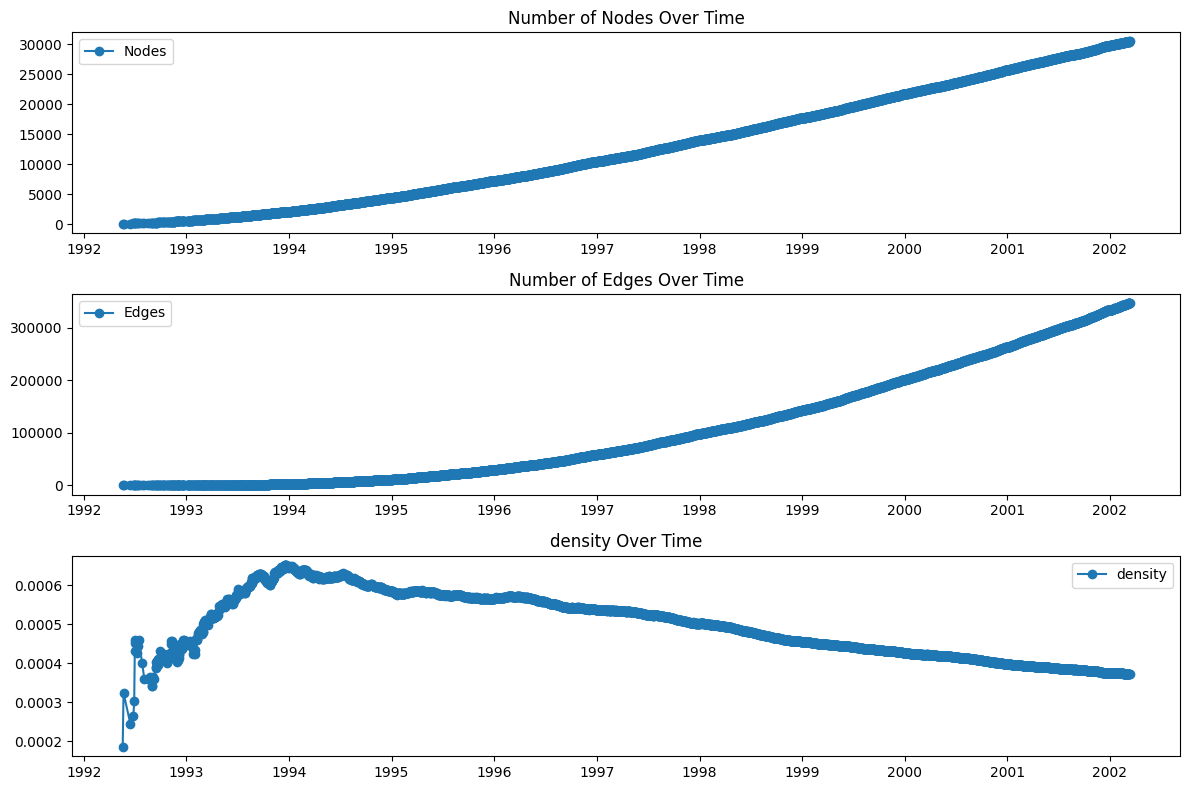

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(properties_df['time'], properties_df['nodes'], marker='o', label='Nodes')
plt.legend()
plt.title('Number of Nodes Over Time')

plt.subplot(3, 1, 2)
plt.plot(properties_df['time'], properties_df['edges'], marker='o', label='Edges')
plt.legend()
plt.title('Number of Edges Over Time')

plt.subplot(3, 1,3)
plt.plot(properties_df['time'], properties_df['density'], marker='o', label='density')
plt.legend()
plt.title('density Over Time')

plt.tight_layout()
plt.show()

In [37]:
# clustering_property=[]
# for time in time_intervals[:801]:
#     subgraph = G.subgraph([node for node, data in G.nodes(data=True) if data['time'] <= time])

#     properties = {
#         'time': time,
#         'clustering_coefficient':nx.clustering(subgraph),
#         'average_clustering_coefficient':nx.average_clustering(subgraph)


#     }
#     clustering_property.append(properties)


# for time in time_intervals[802::500]:
#     subgraph = G.subgraph([node for node, data in G.nodes(data=True) if data['time'] <= time])

#     properties = {
#         'time': time,
#         'clustering_coefficient':nx.clustering(subgraph),
#         'average_clustering_coefficient':nx.average_clustering(subgraph)


#     }
#     clustering_property.append(properties)

# for time in time_intervals[2803::250]:
#     subgraph = G.subgraph([node for node, data in G.nodes(data=True) if data['time'] <= time])

#     properties = {
#         'time': time,
#         'clustering_coefficient':nx.clustering(subgraph),
#         'average_clustering_coefficient':nx.average_clustering(subgraph)


#     }
#     clustering_property.append(properties)

# for time in [time_intervals[-3],time_intervals[-2],time_intervals[-1]]:
#     subgraph = G.subgraph([node for node, data in G.nodes(data=True) if data['time'] <= time])

#     properties = {
#         'time': time,
#         'clustering_coefficient':nx.clustering(subgraph),
#         'average_clustering_coefficient':nx.average_clustering(subgraph)


#     }
#     clustering_property.append(properties)

# for time in time_intervals[2303:2802:100]:
#     subgraph = G.subgraph([node for node, data in G.nodes(data=True) if data['time'] <= time])

#     properties = {
#         'time': time,
#         'clustering_coefficient':nx.clustering(subgraph),
#         'average_clustering_coefficient':nx.average_clustering(subgraph)


#     }
#     clustering_property.append(properties)

In [38]:
# with open('/content/drive/MyDrive/IIIT Graph/Graphinfo_clustering_final_last.pkl', 'wb') as fp:
#     pickle.dump(clustering_property, fp)
#     print('dictionary saved successfully to file')

with open('/content/drive/MyDrive/IIIT Graph/Graphinfo_clustering_final_last.pkl', 'rb') as file:
    clustering_property = pickle.load(file)

# properties_df = pd.DataFrame(clustering_property)

In [39]:
clustering_property_df = pd.DataFrame(clustering_property)
clustering_property_df_sorted=clustering_property_df.sort_values('time')
# clustering_copy=clustering_property_df_sorted.copy()
# with open('/content/drive/MyDrive/IIIT Graph/clustering_copy.pkl', 'wb') as fp:
#     pickle.dump(clustering_copy, fp)
#     print('dictionary saved successfully to file')
with open('/content/drive/MyDrive/IIIT Graph/clustering_copy.pkl', 'rb') as file:
    clustering_copy = pickle.load(file)

# properties_df = pd.DataFrame(clustering_property)


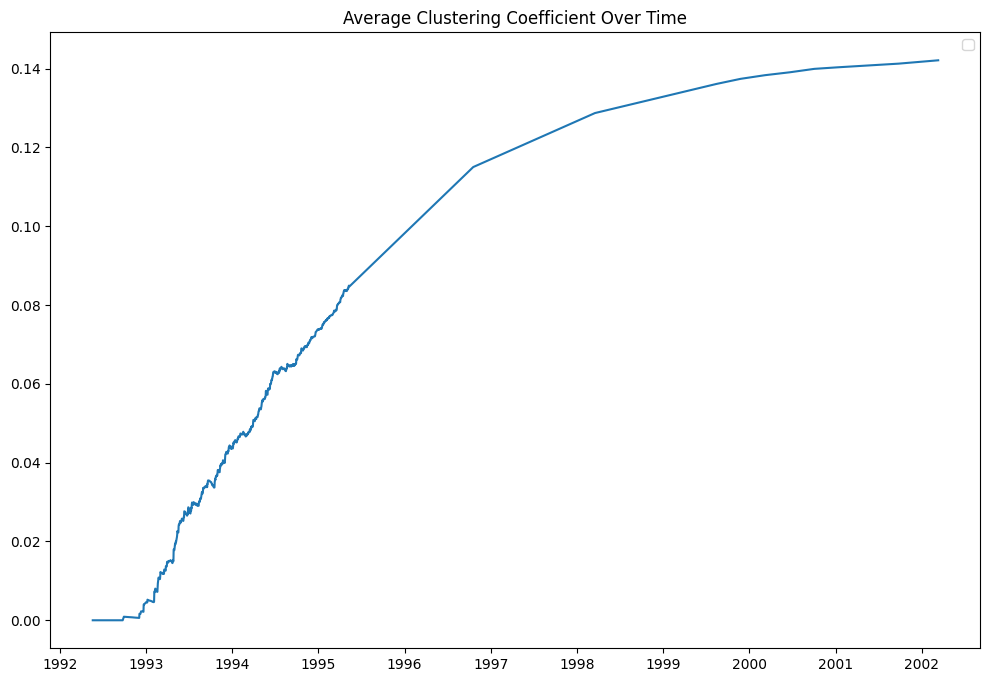

In [79]:
plt.figure(figsize=(12, 8))

plt.plot(clustering_property_df_sorted['time'], clustering_property_df_sorted['average_clustering_coefficient'])
plt.legend()
plt.title('Average Clustering Coefficient Over Time')

plt.show()

In [41]:
clustering_copy['max_clustering_coefficient'] = clustering_copy['clustering_coefficient'].apply(lambda x: max(x.values()))
clustering_copy['min_clustering_coefficient'] = clustering_copy['clustering_coefficient'].apply(lambda x: min(x.values()))
clustering_copy['average_clustering_coefficient']=clustering_property_df_sorted['average_clustering_coefficient']
# clustering_copy['Year']=clustering_copy['time'].dt.to_period('Y')


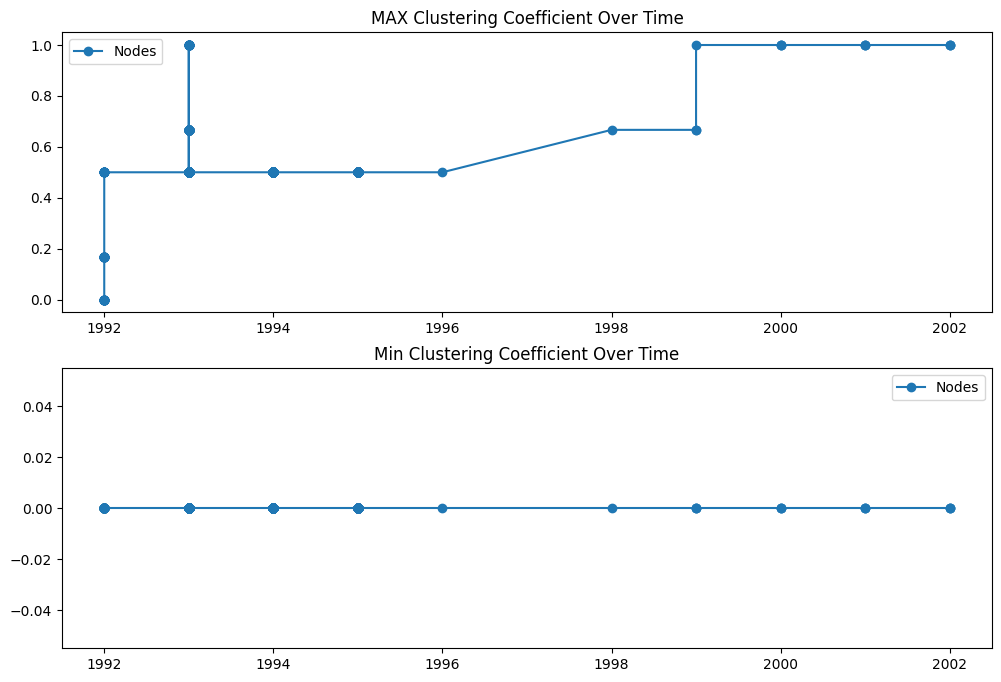

In [42]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(clustering_copy['Year'], clustering_copy['max_clustering_coefficient'], marker='o', label='Nodes')
plt.legend()
plt.title('MAX Clustering Coefficient Over Time')


plt.subplot(2, 1, 2)
plt.plot(clustering_copy['Year'], clustering_copy['min_clustering_coefficient'], marker='o', label='Nodes')
plt.legend()
plt.title('Min Clustering Coefficient Over Time')

plt.show()

In [43]:
result_df = clustering_copy.groupby('Year').agg({
    'min_clustering_coefficient': ['min', 'max', 'mean'],
    'max_clustering_coefficient': ['min', 'max', 'mean'],
})
result_df.columns = ['_'.join(col).strip() for col in result_df.columns.values]


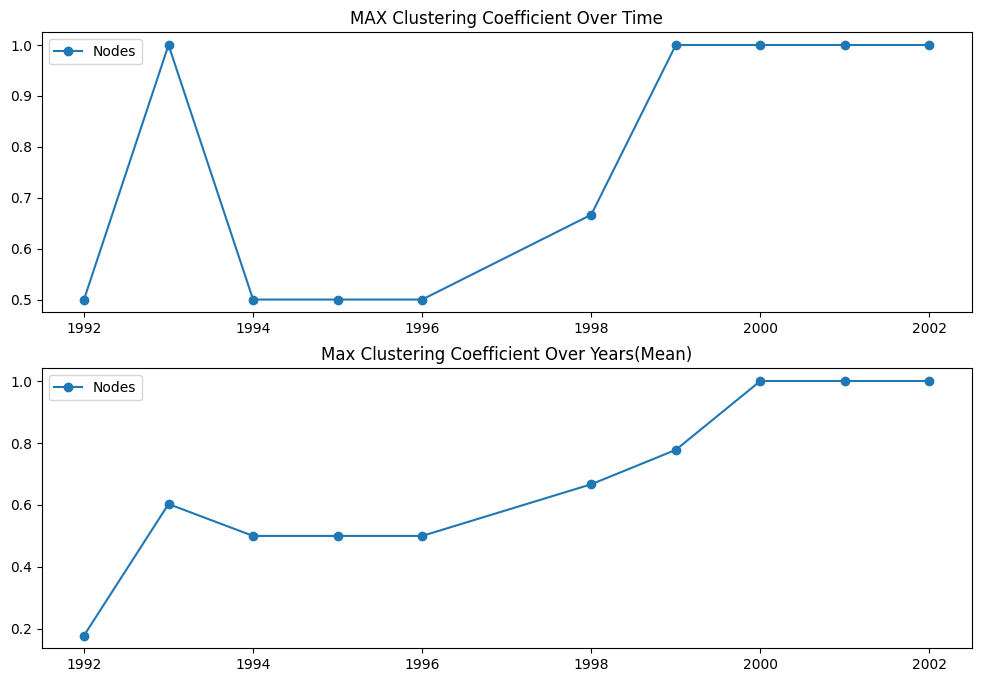

In [44]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(result_df.index, result_df['max_clustering_coefficient_max'], marker='o', label='Nodes')
plt.legend()
plt.title('MAX Clustering Coefficient Over Time')


plt.subplot(2, 1, 2)
plt.plot(result_df.index, result_df['max_clustering_coefficient_mean'], marker='o', label='Nodes')
plt.legend()
plt.title('Max Clustering Coefficient Over Years(Mean)')

plt.show()

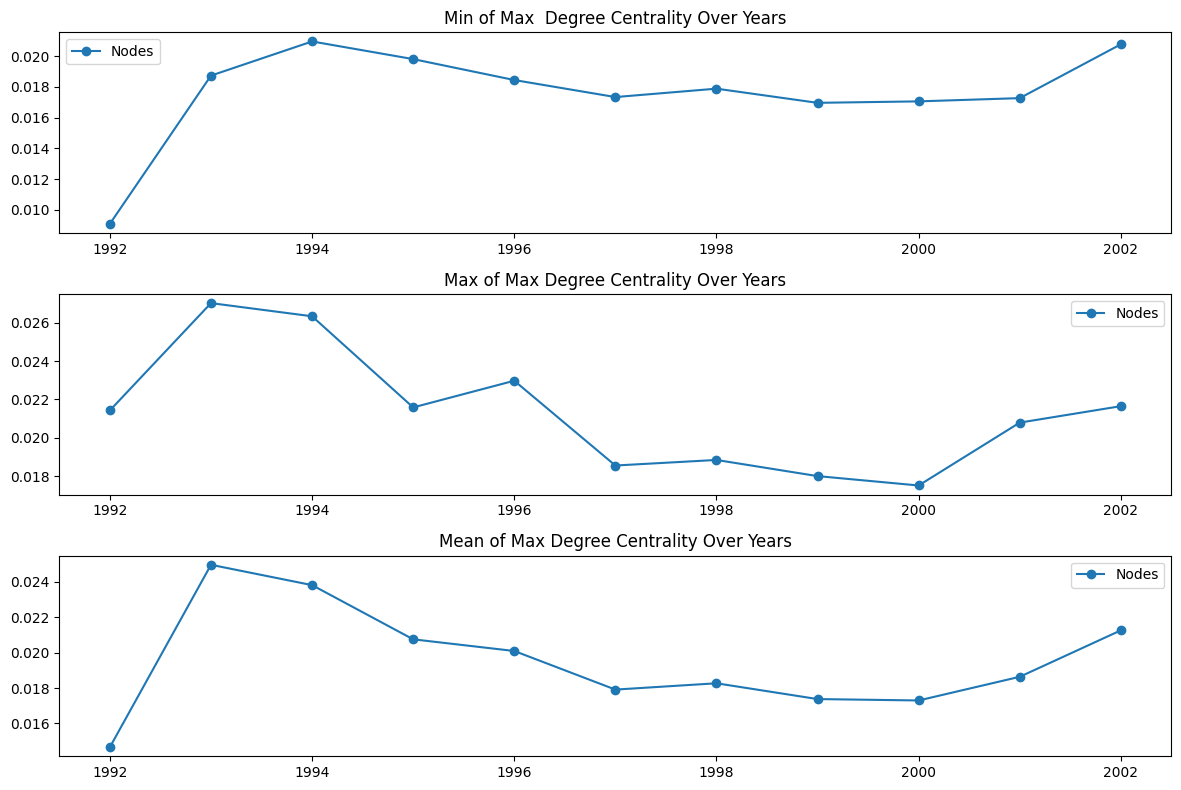

In [45]:
properties_df_copy=properties_df.copy()
properties_df['Year']=properties_df['time'].dt.to_period('Y')
properties_df['max_degree_centrality'] = properties_df_copy['degree_centrality'].apply(lambda x: max(x.values()))
properties_df['min_degree_centrality'] = properties_df_copy['degree_centrality'].apply(lambda x: min(x.values()))
properties_result_df = properties_df.groupby('Year').agg({
    'max_degree_centrality': ['min', 'max', 'mean'],
    'min_degree_centrality': ['min', 'max', 'mean'],
})
properties_result_df.columns = ['_'.join(col).strip() for col in properties_result_df.columns.values]
properties_result_df.index=  properties_result_df.index.astype(str).astype(int)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(properties_result_df.index, properties_result_df['max_degree_centrality_min'], marker='o', label='Nodes')
plt.legend()
plt.title('Min of Max  Degree Centrality Over Years')

plt.subplot(3, 1, 2)
plt.plot(properties_result_df.index, properties_result_df['max_degree_centrality_max'], marker='o', label='Nodes')
plt.legend()
plt.title('Max of Max Degree Centrality Over Years')

plt.subplot(3, 1,3)
plt.plot(properties_result_df.index, properties_result_df['max_degree_centrality_mean'], marker='o', label='Nodes')
plt.legend()
plt.title('Mean of Max Degree Centrality Over Years')

plt.tight_layout()
plt.show()

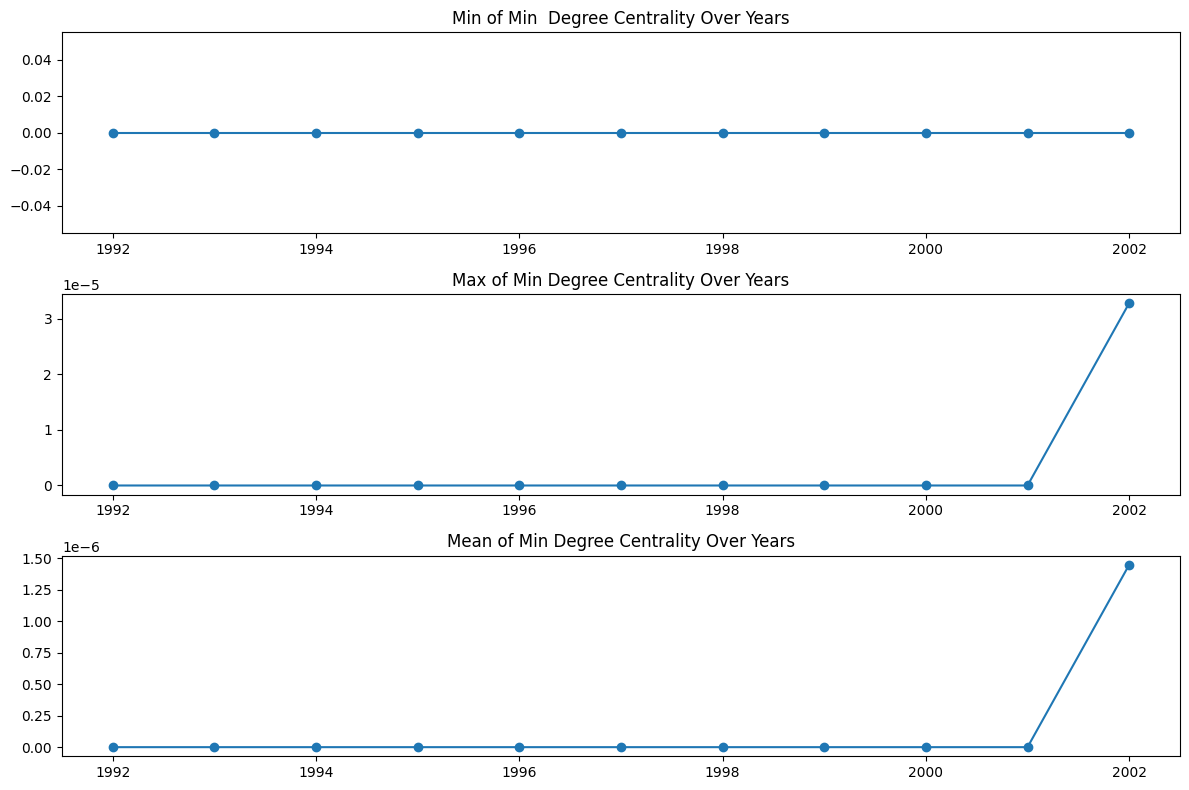

In [67]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(properties_result_df.index, properties_result_df['min_degree_centrality_min'], marker='o')
plt.title('Min of Min  Degree Centrality Over Years')

plt.subplot(3, 1, 2)
plt.plot(properties_result_df.index, properties_result_df['min_degree_centrality_max'], marker='o')
plt.title('Max of Min Degree Centrality Over Years')

plt.subplot(3, 1,3)
plt.plot(properties_result_df.index, properties_result_df['min_degree_centrality_mean'], marker='o')
plt.title('Mean of Min Degree Centrality Over Years')

plt.tight_layout()
plt.show()

In [49]:
pagerank = nx.pagerank(G)


In [77]:
with open('/content/drive/MyDrive/IIIT Graph/assortativity_coefficient_final.pkl', 'rb') as file:
    assortativity_coefficient_p = pickle.load(file)
assortativity_coefficient_df = pd.DataFrame(assortativity_coefficient_p)
assortativity_coefficient_df=assortativity_coefficient_df.sort_values('time')

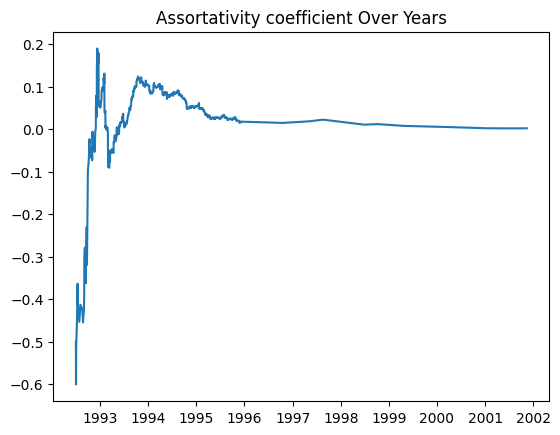

In [78]:
plt.plot(assortativity_coefficient_df['time'], assortativity_coefficient_df['assortativity_coefficient'])
plt.title('Assortativity coefficient Over Years')
plt.show()

In [69]:
GT=nx.DiGraph()
GT.add_nodes_from(list(set(dfe[['source', 'target']].values.flatten())))
m=[tuple(x) for x in dfe.to_records(index=False)]
GT.add_edges_from(m)

In [73]:
print('Density:', nx.density(GT))
print('Average clustering coefficient:', nx.average_clustering(GT))
print('Degree Assortativity', nx.degree_assortativity_coefficient(GT))
print('Number of strongly connected components',nx.number_strongly_connected_components(GT))
print('Number of Weakly connected components',nx.number_weakly_connected_components(GT))

Density: 0.00035326041393102855
Average clustering coefficient: 0.1432638342125272
Degree Assortativity -0.0026282264038245853
Number of strongly connected components 21608
Number of Weakly connected components 61
